In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, f1_score
from rfpimp import permutation_importances

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

import logistic_regression_functions as lrf
import GradientDescent as GD
GradientDescent = GD.GradientDescent

from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant

In [367]:
import random

In [339]:
from scipy import stats
import numpy as np

In [150]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import roc_auc_score
from rfpimp import importances, plot_importances
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix

In [2]:
from sklearn import preprocessing

In [3]:
from process_players import *

In [4]:
from sklearn.cluster import KMeans

In [572]:
pd.set_option('display.max_columns', 2000)
pd.set_option('precision', 3) #setting the number of decimel points

In [6]:
#get defensive votes
%run defvotes

In [7]:
#make d_votes table
#fv = sum_past_yrs(fv_dict2)
sdd = replace_nans(fv_dict2)
d_votes = make_df(sdd)

In [8]:
#combine main player data with d_votes table
pdata = get_clean_pdata()
pdata = add_defvotes(pdata, d_votes)

In [9]:
pdata[pdata['Player'] == 'Caron Butler']

,Player,Pos,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,TM,YR,YRprior,2YRprior,MPG,advotes
1000,Caron Butler,SF,32.0,78.0,1879.0,12.4,0.54,0.46,0.12,2.6,11.4,7.1,6.5,1.4,0.5,8.7,20.2,1.9,1.6,3.6,0.09,0.3,-1.9,-1.6,0.2,Los Angeles Clippers 12-13,13,12.0,11.0,24.09,0.42
1055,Caron Butler,SF,34.0,78.0,1623.0,9.3,0.54,0.55,0.15,1.4,12.2,6.6,7.3,1.4,0.2,10.4,12.9,1.3,1.0,2.4,0.07,-1.0,-0.5,-1.5,0.2,Detroit Pistons 14-15,15,14.0,13.0,20.81,0.24
1456,Caron Butler,SF,25.0,75.0,2708.0,17.0,0.54,0.11,0.31,4.8,15.6,10.0,12.1,2.4,0.5,12.4,23.2,3.5,2.8,6.3,0.11,0.5,0.3,0.8,1.9,Washington Wizards 05-06,6,5.0,4.0,36.11,0.00
2203,Caron Butler,SG,28.0,67.0,2585.0,18.8,0.55,0.19,0.37,5.2,13.8,9.4,19.7,2.2,0.6,14.3,25.9,3.4,1.1,4.5,0.08,2.6,-0.8,1.8,2.5,Washington Wizards 08-09,9,8.0,7.0,38.58,0.75
2619,Caron Butler,SF,31.0,63.0,1871.0,11.7,0.50,0.36,0.15,2.8,12.0,7.3,6.8,1.5,0.4,9.3,20.4,1.2,1.1,2.3,0.06,-0.7,-1.5,-2.2,-0.1,Los Angeles Clippers 11-12,12,11.0,10.0,29.70,0.56
2631,Caron Butler,SF,26.0,63.0,2474.0,18.3,0.54,0.07,0.34,6.6,15.3,10.8,15.9,2.8,0.5,13.9,23.1,3.4,1.9,5.3,0.10,1.4,0.5,1.9,2.5,Washington Wizards 06-07,7,6.0,5.0,39.27,2.00
2967,Caron Butler,SF,27.0,58.0,2314.0,20.7,0.56,0.20,0.28,4.6,15.4,9.8,21.9,3.0,0.7,12.4,24.0,4.8,2.4,7.2,0.15,3.7,1.0,4.7,3.9,Washington Wizards 07-08,8,7.0,6.0,39.90,1.00
3738,Caron Butler,SF,29.0,47.0,1853.0,13.5,0.51,0.14,0.30,4.2,15.6,9.8,9.6,1.9,0.6,12.6,22.0,0.4,1.7,2.1,0.05,-1.0,0.3,-0.8,0.6,Washington Wizards 09-10,10,9.0,8.0,39.43,1.00
4429,Caron Butler,SF,33.0,34.0,821.0,12.4,0.49,0.41,0.16,2.2,20.5,11.0,11.9,1.5,1.1,12.1,23.7,-0.2,0.5,0.2,0.01,-1.7,-2.1,-3.9,-0.4,Milwaukee Bucks 13-14,14,13.0,12.0,24.15,0.32
4659,Caron Butler,SF,30.0,29.0,867.0,14.2,0.52,0.17,0.23,3.1,12.5,8.0,9.1,1.7,0.7,10.5,25.1,0.2,1.0,1.2,0.07,-1.4,0.0,-1.4,0.1,Dallas Mavericks 10-11,11,10.0,9.0,29.90,0.75


In [31]:
#add age multiplier
pdata['AgeMulti'] = 1
pdata.loc[pdata['Age'] > 31,'AgeMulti'] = .95
pdata.loc[pdata['Age'] > 34,'AgeMulti'] = .9
pdata.loc[pdata['Age'] < 24, 'AgeMulti'] = 1.2
pdata.loc[pdata['Age'] < 21, 'AgeMulti'] = 1.33

In [32]:
#drop nans and players who played less than 31 games (half of strike shortened season)
p_wage = pdata.dropna()
p_wage = p_wage[p_wage['G'] > 11]

In [33]:
#Create a list of columns to normalize
cols = ['MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP','MPG', 'advotes']

In [34]:
#separate p_wage into df's by position
dflist = []
for i in ['PF', 'PG', 'SF', 'SG', 'C']:
    df = p_wage[p_wage['Pos'] == i].reset_index()
    dflist.append(df)

In [35]:
#Make everything a normalized version of itself
dfscaledlist = []
count = 0
for i in ['PF', 'PG', 'SF', 'SG', 'C']:
    x = p_wage[p_wage['Pos'] == i][['MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
           'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
           'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP','MPG', 'advotes']] #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled, columns=['sMP', 'sPER', 'sTS%', 's3PAr', 'sFTr', 'sORB%',
           'sDRB%', 'sTRB%', 'sAST%', 'sSTL%', 'sBLK%', 'sTOV%', 'sUSG%','sOWS', 'sDWS',
           'sWS', 'sWS/48', 'sOBPM', 'sDBPM', 'sBPM','sVORP','sMPG', 'sadvotes'])
    dfscaled = pd.concat([dflist[count], df], axis=1, sort=False)
    dfscaledlist.append(dfscaled)
    count += 1

In [36]:
#Rejoin positioned dataframes
dfs = dfscaledlist[0].append(dfscaledlist[1])
dfs = dfs.append(dfscaledlist[2])
dfs = dfs.append(dfscaledlist[3])
dfs = dfs.append(dfscaledlist[4])

In [37]:
#Make offensive and defensive clusters
Xo = dfs[['sPER', 's3PAr','sORB%', 'sAST%', 'sUSG%', 'sOWS','sOBPM', 'sVORP', 'sMPG']]
Xd = dfs[['sDRB%', 'sSTL%', 'sBLK%', 'sDWS', 'sDBPM', 'sVORP','sMPG', 'sadvotes']]

In [38]:
#Create Kmeans models for offense and defense
kmeansO = KMeans(n_clusters=20, random_state=7).fit(Xo)
kmeansD = KMeans(n_clusters=10, random_state=9).fit(Xd)

In [39]:
#Create labels to tie back to individual players
labsO = kmeansO.labels_
labsD = kmeansD.labels_

In [40]:
#Add clusters back to dfs
dfs['O_cluster'] = labsO
dfs['D_cluster'] = labsD

In [41]:
dind = list(dfs.groupby('D_cluster').mean().sort_values('DBPM', ascending=False).reset_index()['D_cluster'].values)

In [42]:
oind = list(dfs.groupby('O_cluster').mean().sort_values('OBPM', ascending=False).reset_index()['O_cluster'].values)

In [43]:
#Reassign values to numerical values from greatest to least based on highest mean win shares
count = 9
for i in dind:
    dfs.loc[dfs['D_cluster'] == i,'D_clust'] = count
    count -= 1

In [44]:
#Reassign values to numerical values from greatest to least based on highest mean win shares
count = 19
for i in oind:
    dfs.loc[dfs['O_cluster'] == i,'O_clust'] = count
    count -= 1

In [45]:
#Assign position scaled dataframe
p_sca = dfs

In [46]:
p_sca['O_clust'] = (p_sca['O_clust']**1.5)/6
p_sca['D_clust'] = (p_sca['D_clust']**1.5)/3

In [47]:
p_sca[p_sca['TM'] == 'Dallas Mavericks 10-11']

,index,Player,Pos,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,TM,YR,YRprior,2YRprior,MPG,advotes,AgeMulti,sMP,sPER,sTS%,s3PAr,sFTr,sORB%,sDRB%,sTRB%,sAST%,sSTL%,sBLK%,sTOV%,sUSG%,sOWS,sDWS,sWS,sWS/48,sOBPM,sDBPM,sBPM,sVORP,sMPG,sadvotes,O_cluster,D_cluster,D_clust,O_clust
349,1666,Dirk Nowitzki,PF,32.0,73.0,2504.0,23.4,0.61,1.42e-01,0.38,2.4,20.8,12.0,14.2,0.8,1.4,9.1,28.2,7.8,3.3,11.1,2.13e-01,3.2,0.6,3.8,3.7,Dallas Mavericks 10-11,11,10.0,9.0,34.30,0.00,0.95,0.76,0.74,0.78,1.53e-01,0.24,0.08,0.48,0.36,0.32,0.21,0.09,0.27,0.75,0.60,0.48,0.61,0.79,0.73,0.55,0.73,0.48,0.84,0.00e+00,14,7,2.67,12.73
74,375,J.J. Barea,PG,26.0,81.0,1669.0,14.8,0.54,2.91e-01,0.24,2.1,8.8,5.6,31.2,0.9,0.0,15.9,23.9,1.9,1.4,3.2,9.30e-02,0.6,-1.7,-1.1,0.4,Dallas Mavericks 10-11,11,10.0,9.0,20.60,0.00,1.00,0.48,0.50,0.67,3.52e-01,0.24,0.20,0.31,0.33,0.48,0.15,0.00,0.25,0.51,0.30,0.28,0.26,0.54,0.46,0.41,0.42,0.13,0.44,0.00e+00,12,3,0.33,8.73
147,707,Jason Kidd,PG,37.0,80.0,2653.0,14.4,0.50,6.56e-01,0.13,1.6,13.4,7.7,35.4,2.7,0.8,22.1,14.3,2.5,3.9,6.4,1.16e-01,1.0,2.1,3.1,3.4,Dallas Mavericks 10-11,11,10.0,9.0,33.16,9.00,0.90,0.78,0.49,0.60,7.94e-01,0.13,0.15,0.47,0.45,0.57,0.46,0.24,0.36,0.24,0.34,0.71,0.42,0.58,0.48,0.76,0.57,0.35,0.75,1.80e-01,10,2,7.54,7.81
929,4725,Rodrigue Beaubois,PG,22.0,28.0,496.0,11.4,0.50,3.72e-01,0.14,1.7,10.2,6.1,21.9,2.1,1.2,16.6,26.7,-0.4,0.7,0.2,2.20e-02,-1.4,-0.1,-1.5,0.1,Dallas Mavericks 10-11,11,10.0,9.0,17.71,0.00,1.20,0.13,0.40,0.60,4.50e-01,0.14,0.16,0.35,0.36,0.30,0.36,0.35,0.26,0.58,0.17,0.16,0.11,0.39,0.37,0.56,0.41,0.11,0.37,0.00e+00,1,6,6.17,5.27
141,709,Shawn Marion,SF,32.0,80.0,2253.0,17.0,0.55,4.00e-02,0.20,9.1,19.2,14.3,8.3,1.6,1.7,12.5,21.5,2.3,3.4,5.6,1.20e-01,-0.7,1.8,1.2,1.8,Dallas Mavericks 10-11,11,10.0,9.0,28.16,1.00,0.95,0.67,0.55,0.63,4.24e-02,0.15,0.59,0.68,0.82,0.20,0.36,0.19,0.36,0.55,0.28,0.53,0.33,0.62,0.48,0.73,0.54,0.27,0.63,1.54e-02,3,1,4.90,6.08
593,3142,Brian Cardinal,SF,33.0,56.0,618.0,9.7,0.67,8.70e-01,0.18,2.0,8.9,5.6,9.1,2.0,0.9,13.6,9.5,1.0,0.7,1.7,1.32e-01,1.1,1.3,2.4,0.7,Dallas Mavericks 10-11,11,10.0,9.0,11.04,0.00,0.95,0.17,0.33,0.86,9.23e-01,0.14,0.13,0.22,0.22,0.22,0.44,0.10,0.39,0.15,0.20,0.12,0.15,0.64,0.57,0.69,0.59,0.19,0.19,0.00e+00,11,8,3.73,3.77
868,4659,Caron Butler,SF,30.0,29.0,867.0,14.2,0.52,1.72e-01,0.23,3.1,12.5,8.0,9.1,1.7,0.7,10.5,25.1,0.2,1.0,1.2,6.70e-02,-1.4,0.0,-1.4,0.1,Dallas Mavericks 10-11,11,10.0,9.0,29.90,0.75,1.00,0.25,0.47,0.58,1.82e-01,0.18,0.20,0.38,0.38,0.22,0.38,0.08,0.30,0.67,0.16,0.17,0.12,0.51,0.45,0.58,0.44,0.14,0.67,1.15e-02,16,5,0.94,3.09
915,4889,Peja Stojakovic,SF,33.0,25.0,506.0,14.1,0.56,5.71e-01,0.09,3.4,11.6,7.6,7.0,1.1,0.3,5.4,18.7,0.7,0.5,1.2,1.18e-01,1.7,-1.1,0.6,0.3,Dallas Mavericks 10-11,11,10.0,9.0,20.24,0.00,0.95,0.14,0.46,0.65,6.06e-01,0.07,0.22,0.34,0.35,0.17,0.24,0.03,0.15,0.46,0.18,0.09,0.12,0.61,0.60,0.48,0.52,0.16,0.43,0.00e+00,10,3,0.33,7.81
54,263,Jason Terry,SG,33.0,82.0,2564.0,15.9,0.55,3.22e-01,0.20,1.1,5.7,3.5,22.2,1.9,0.4,12.4,24.7,2.8,2.5,5.3,1.00e-01,1.5,-0.9,0.6,1.7,Dallas Mavericks 10-11,11,10.0,9.0,31.27,0.24,0.95,0.75,0.61,0.73,3.22e-01,0.20,0.06,0.13,0.07,0.47,0.42,0.09,0.31,0.58,0.37,0.55,0.37,0.66,0.64,0.48,0.64,0.29,0.72,4.48e-03,18,7,2.67,11.68
376,1754,DeShawn Stevenson,SG,29.0,72.0,1158.0,9.8,0.55,7.55e-01,0.13,2.1,8.4,5.4,10.0,1.0,0.3,11.2,15.9,0.8,1.0,1.8,7.40e-02,0.6,-0.8,-0.3,0.5,Dallas Mavericks 10-11,11,10.0,9.0,16.08,0.00,1.00,0.33,0.45,0.74,7.55e-01,0.14,0.12,0.27,0.22,0.18,0.22,0.07,0.28,0.32,0.23,0.25,0.17,0.62,0.60,0.49,0.61,0.19,0.34,0.00e+00,11,3,0.33,3.77


In [72]:
%run process_players

In [48]:
p2yr = p_sca[['Player','Age','Pos','G','MP','TM','YR','YRprior','2YRprior','AgeMulti', 'sPER', 'sTS%', 's3PAr', 'sFTr', 'sORB%',
           'sDRB%', 'sTRB%', 'sAST%', 'sSTL%', 'sBLK%', 'sTOV%', 'sUSG%', 'sOWS', 'sDWS',
           'sWS', 'sWS/48', 'sOBPM', 'sDBPM', 'sBPM', 'sVORP','sMPG', 'sadvotes', 'O_cluster', 'D_cluster','D_clust','O_clust']]

In [49]:
p2yr[p2yr['TM'] == 'Dallas Mavericks 10-11']

,Player,Age,Pos,G,MP,TM,YR,YRprior,2YRprior,AgeMulti,sPER,sTS%,s3PAr,sFTr,sORB%,sDRB%,sTRB%,sAST%,sSTL%,sBLK%,sTOV%,sUSG%,sOWS,sDWS,sWS,sWS/48,sOBPM,sDBPM,sBPM,sVORP,sMPG,sadvotes,O_cluster,D_cluster,D_clust,O_clust
349,Dirk Nowitzki,32.0,PF,73.0,2504.0,Dallas Mavericks 10-11,11,10.0,9.0,0.95,0.74,0.78,1.53e-01,0.24,0.08,0.48,0.36,0.32,0.21,0.09,0.27,0.75,0.60,0.48,0.61,0.79,0.73,0.55,0.73,0.48,0.84,0.00e+00,14,7,2.67,12.73
74,J.J. Barea,26.0,PG,81.0,1669.0,Dallas Mavericks 10-11,11,10.0,9.0,1.00,0.50,0.67,3.52e-01,0.24,0.20,0.31,0.33,0.48,0.15,0.00,0.25,0.51,0.30,0.28,0.26,0.54,0.46,0.41,0.42,0.13,0.44,0.00e+00,12,3,0.33,8.73
147,Jason Kidd,37.0,PG,80.0,2653.0,Dallas Mavericks 10-11,11,10.0,9.0,0.90,0.49,0.60,7.94e-01,0.13,0.15,0.47,0.45,0.57,0.46,0.24,0.36,0.24,0.34,0.71,0.42,0.58,0.48,0.76,0.57,0.35,0.75,1.80e-01,10,2,7.54,7.81
929,Rodrigue Beaubois,22.0,PG,28.0,496.0,Dallas Mavericks 10-11,11,10.0,9.0,1.20,0.40,0.60,4.50e-01,0.14,0.16,0.35,0.36,0.30,0.36,0.35,0.26,0.58,0.17,0.16,0.11,0.39,0.37,0.56,0.41,0.11,0.37,0.00e+00,1,6,6.17,5.27
141,Shawn Marion,32.0,SF,80.0,2253.0,Dallas Mavericks 10-11,11,10.0,9.0,0.95,0.55,0.63,4.24e-02,0.15,0.59,0.68,0.82,0.20,0.36,0.19,0.36,0.55,0.28,0.53,0.33,0.62,0.48,0.73,0.54,0.27,0.63,1.54e-02,3,1,4.90,6.08
593,Brian Cardinal,33.0,SF,56.0,618.0,Dallas Mavericks 10-11,11,10.0,9.0,0.95,0.33,0.86,9.23e-01,0.14,0.13,0.22,0.22,0.22,0.44,0.10,0.39,0.15,0.20,0.12,0.15,0.64,0.57,0.69,0.59,0.19,0.19,0.00e+00,11,8,3.73,3.77
868,Caron Butler,30.0,SF,29.0,867.0,Dallas Mavericks 10-11,11,10.0,9.0,1.00,0.47,0.58,1.82e-01,0.18,0.20,0.38,0.38,0.22,0.38,0.08,0.30,0.67,0.16,0.17,0.12,0.51,0.45,0.58,0.44,0.14,0.67,1.15e-02,16,5,0.94,3.09
915,Peja Stojakovic,33.0,SF,25.0,506.0,Dallas Mavericks 10-11,11,10.0,9.0,0.95,0.46,0.65,6.06e-01,0.07,0.22,0.34,0.35,0.17,0.24,0.03,0.15,0.46,0.18,0.09,0.12,0.61,0.60,0.48,0.52,0.16,0.43,0.00e+00,10,3,0.33,7.81
54,Jason Terry,33.0,SG,82.0,2564.0,Dallas Mavericks 10-11,11,10.0,9.0,0.95,0.61,0.73,3.22e-01,0.20,0.06,0.13,0.07,0.47,0.42,0.09,0.31,0.58,0.37,0.55,0.37,0.66,0.64,0.48,0.64,0.29,0.72,4.48e-03,18,7,2.67,11.68
376,DeShawn Stevenson,29.0,SG,72.0,1158.0,Dallas Mavericks 10-11,11,10.0,9.0,1.00,0.45,0.74,7.55e-01,0.14,0.12,0.27,0.22,0.18,0.22,0.07,0.28,0.32,0.23,0.25,0.17,0.62,0.60,0.49,0.61,0.19,0.34,0.00e+00,11,3,0.33,3.77


In [50]:
p2 = add_2yrs_prior(p2yr)

In [51]:
list(p2.columns.values)

['Player',
 'Age_x',
 'Pos_x',
 'G_x',
 'MP_x',
 'TM_x',
 'YR_x',
 'YRprior_x',
 '2YRprior_x',
 'AgeMulti_x',
 'sPER_x',
 'sTS%_x',
 's3PAr_x',
 'sFTr_x',
 'sORB%_x',
 'sDRB%_x',
 'sTRB%_x',
 'sAST%_x',
 'sSTL%_x',
 'sBLK%_x',
 'sTOV%_x',
 'sUSG%_x',
 'sOWS_x',
 'sDWS_x',
 'sWS_x',
 'sWS/48_x',
 'sOBPM_x',
 'sDBPM_x',
 'sBPM_x',
 'sVORP_x',
 'sMPG_x',
 'sadvotes_x',
 'O_cluster_x',
 'D_cluster_x',
 'D_clust_x',
 'O_clust_x',
 'Age_y',
 'Pos_y',
 'G_y',
 'MP_y',
 'TM_y',
 'YR_y',
 'YRprior_y',
 '2YRprior_y',
 'AgeMulti_y',
 'sPER_y',
 'sTS%_y',
 's3PAr_y',
 'sFTr_y',
 'sORB%_y',
 'sDRB%_y',
 'sTRB%_y',
 'sAST%_y',
 'sSTL%_y',
 'sBLK%_y',
 'sTOV%_y',
 'sUSG%_y',
 'sOWS_y',
 'sDWS_y',
 'sWS_y',
 'sWS/48_y',
 'sOBPM_y',
 'sDBPM_y',
 'sBPM_y',
 'sVORP_y',
 'sMPG_y',
 'sadvotes_y',
 'O_cluster_y',
 'D_cluster_y',
 'D_clust_y',
 'O_clust_y',
 'Age',
 'Pos',
 'G',
 'MP',
 'TM',
 'YR',
 'YRprior',
 '2YRprior',
 'AgeMulti',
 'sPER',
 'sTS%',
 's3PAr',
 'sFTr',
 'sORB%',
 'sDRB%',
 'sTRB%',
 'sAS

In [55]:
p2[(p2['TM_x'] == 'Dallas Mavericks 10-11')]

,Player,Age_x,Pos_x,G_x,MP_x,TM_x,YR_x,YRprior_x,2YRprior_x,AgeMulti_x,sPER_x,sTS%_x,s3PAr_x,sFTr_x,sORB%_x,sDRB%_x,sTRB%_x,sAST%_x,sSTL%_x,sBLK%_x,sTOV%_x,sUSG%_x,sOWS_x,sDWS_x,sWS_x,sWS/48_x,sOBPM_x,sDBPM_x,sBPM_x,sVORP_x,sMPG_x,sadvotes_x,O_cluster_x,D_cluster_x,D_clust_x,O_clust_x,Age_y,Pos_y,G_y,MP_y,TM_y,YR_y,YRprior_y,2YRprior_y,AgeMulti_y,sPER_y,sTS%_y,s3PAr_y,sFTr_y,sORB%_y,sDRB%_y,sTRB%_y,sAST%_y,sSTL%_y,sBLK%_y,sTOV%_y,sUSG%_y,sOWS_y,sDWS_y,sWS_y,sWS/48_y,sOBPM_y,sDBPM_y,sBPM_y,sVORP_y,sMPG_y,sadvotes_y,O_cluster_y,D_cluster_y,D_clust_y,O_clust_y,Age,Pos,G,MP,TM,YR,YRprior,2YRprior,AgeMulti,sPER,sTS%,s3PAr,sFTr,sORB%,sDRB%,sTRB%,sAST%,sSTL%,sBLK%,sTOV%,sUSG%,sOWS,sDWS,sWS,sWS/48,sOBPM,sDBPM,sBPM,sVORP,sMPG,sadvotes,O_cluster,D_cluster,D_clust,O_clust
349,Dirk Nowitzki,32.0,PF,73.0,2504.0,Dallas Mavericks 10-11,11.0,10.0,9.0,0.95,0.74,0.78,1.53e-01,0.24,0.08,0.48,0.36,0.32,0.21,0.09,0.27,0.75,0.60,0.48,0.61,0.79,0.73,0.55,0.73,0.48,0.84,0.00e+00,14.0,7.0,2.67,12.73,31.0,PF,81.0,3039.0,Dallas Mavericks 09-10,10.0,9.0,8.0,1.00,0.72,0.72,0.09,0.25,0.11,0.46,0.34,0.29,0.31,0.13,0.23,0.77,0.63,0.57,0.66,0.75,0.69,0.52,0.69,0.47,0.93,0.00e+00,15.0,7.0,2.67,10.67,30.0,PF,81.0,3050.0,Dallas Mavericks 08-09,9.0,8.0,7.0,1.0,0.73,0.70,0.11,0.21,0.12,0.51,0.39,0.27,0.26,0.10,0.23,0.82,0.58,0.49,0.60,0.71,0.67,0.43,0.64,0.37,0.93,0.00e+00,9.0,7.0,2.67,9.68
1219,J.J. Barea,26.0,PG,81.0,1669.0,Dallas Mavericks 10-11,11.0,10.0,9.0,1.00,0.50,0.67,3.52e-01,0.24,0.20,0.31,0.33,0.48,0.15,0.00,0.25,0.51,0.30,0.28,0.26,0.54,0.46,0.41,0.42,0.13,0.44,0.00e+00,12.0,3.0,0.33,8.73,25.0,PG,78.0,1546.0,Dallas Mavericks 09-10,10.0,9.0,8.0,1.00,0.45,0.65,0.36,0.17,0.12,0.33,0.32,0.38,0.20,0.09,0.24,0.40,0.25,0.24,0.21,0.49,0.41,0.40,0.38,0.09,0.42,0.00e+00,6.0,3.0,0.33,1.86,24.0,SG,79.0,1600.0,Dallas Mavericks 08-09,9.0,8.0,7.0,1.0,0.54,0.68,0.28,0.17,0.15,0.35,0.30,0.57,0.27,0.05,0.38,0.45,0.26,0.25,0.19,0.60,0.57,0.40,0.55,0.15,0.45,0.00e+00,12.0,3.0,0.33,8.73
1292,Jason Kidd,37.0,PG,80.0,2653.0,Dallas Mavericks 10-11,11.0,10.0,9.0,0.90,0.49,0.60,7.94e-01,0.13,0.15,0.47,0.45,0.57,0.46,0.24,0.36,0.24,0.34,0.71,0.42,0.58,0.48,0.76,0.57,0.35,0.75,1.80e-01,10.0,2.0,7.54,7.81,36.0,PG,80.0,2881.0,Dallas Mavericks 09-10,10.0,9.0,8.0,0.90,0.58,0.76,0.75,0.15,0.18,0.54,0.52,0.59,0.44,0.26,0.35,0.25,0.47,0.72,0.54,0.65,0.56,0.71,0.61,0.43,0.82,2.40e-01,18.0,2.0,7.54,11.68,35.0,PG,81.0,2886.0,Dallas Mavericks 08-09,9.0,8.0,7.0,0.9,0.57,0.70,0.63,0.17,0.32,0.57,0.58,0.55,0.49,0.29,0.36,0.22,0.46,0.71,0.52,0.64,0.54,0.78,0.62,0.44,0.81,6.00e-02,18.0,2.0,7.54,11.68
2074,Rodrigue Beaubois,22.0,PG,28.0,496.0,Dallas Mavericks 10-11,11.0,10.0,9.0,1.20,0.40,0.60,4.50e-01,0.14,0.16,0.35,0.36,0.30,0.36,0.35,0.26,0.58,0.17,0.16,0.11,0.39,0.37,0.56,0.41,0.11,0.37,0.00e+00,1.0,6.0,6.17,5.27,21.0,PG,56.0,700.0,Dallas Mavericks 09-10,10.0,9.0,8.0,1.20,0.61,0.84,0.45,0.17,0.19,0.37,0.37,0.23,0.36,0.38,0.22,0.53,0.26,0.17,0.20,0.62,0.55,0.46,0.51,0.14,0.24,0.00e+00,1.0,6.0,6.17,5.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2362,Shawn Marion,32.0,SF,80.0,2253.0,Dallas Mavericks 10-11,11.0,10.0,9.0,0.95,0.55,0.63,4.24e-02,0.15,0.59,0.68,0.82,0.20,0.36,0.19,0.36,0.55,0.28,0.53,0.33,0.62,0.48,0.73,0.54,0.27,0.63,1.54e-02,3.0,1.0,4.90,6.08,31.0,SF,75.0,2385.0,Dallas Mavericks 09-10,10.0,9.0,8.0,1.00,0.48,0.60,0.03,0.14,0.50,0.50,0.62,0.17,0.33,0.22,0.30,0.44,0.27,0.44,0.30,0.58,0.47,0.70,0.51,0.25,0.72,9.74e-02,16.0,7.0,2.67,3.09,30.0,SF,42.0,1516.0,Miami Heat 08-09,9.0,8.0,7.0,1.0,0.51,0.58,0.10,0.15,0.55,0.74,0.83,0.20,0.44,0.27,0.30,0.39,0.23,0.35,0.23,0.60,0.46,0.77,0.54,0.22,0.83,1.30e-01,16.0,2.0,7.54,3.09
2814,Brian Cardinal,33.0,SF,56.0,618.0,Dallas Mavericks 10-11,11.0,10.0,9.0,0.95,0.33,0.86,9.23e-01,0.14,0.13,0.22,0.22,0.22,0.44,0.10,0.39,0.15,0.20,0.12,0.15,0.64,0.57,0.69,0.59,0.19,0.19,0.00e+00,11.0,8.0,3.73,3.77,32.0,PF,29.0,267.0,Minnesota Timberwolves 09-10,10.0,9.

In [61]:
lastyr= [
    
 'MP_y',
 
 'YR_y',
 'YRprior_y',
 '2YRprior_y',
 'AgeMulti_y',
 'sPER_y',
 'sTS%_y',
 's3PAr_y',
 'sFTr_y',
 'sORB%_y',
 'sDRB%_y',
 'sTRB%_y',
 'sAST%_y',
 'sSTL%_y',
 'sBLK%_y',
 'sTOV%_y',
 'sUSG%_y',
 'sOWS_y',
 'sDWS_y',
 'sWS_y',
 'sWS/48_y',
 'sOBPM_y',
 'sDBPM_y',
 'sBPM_y',
 'sVORP_y',
 'sMPG_y',
 'sadvotes_y',
 'O_cluster_y',
 'D_cluster_y',
 'D_clust_y',
 'O_clust_y',
]

In [62]:
lastyr2 = ['MP',
 'YR',
 'YRprior',
 '2YRprior',
 'AgeMulti',
 'sPER',
 'sTS%',
 's3PAr',
 'sFTr',
 'sORB%',
 'sDRB%',
 'sTRB%',
 'sAST%',
 'sSTL%',
 'sBLK%',
 'sTOV%',
 'sUSG%',
 'sOWS',
 'sDWS',
 'sWS',
 'sWS/48',
 'sOBPM',
 'sDBPM',
 'sBPM',
 'sVORP',
 'sMPG',
 'sadvotes',
 'O_cluster',
 'D_cluster',
 'D_clust',
 'O_clust']

In [58]:
p3 = p2

In [63]:
#fillna from last yr
for i in range(len(lastyr)):
    p3[lastyr[i]] = p3[lastyr[i]].fillna(value=(.75 * p3[lastyr2[i]]))

In [64]:
#fillna from last yr
for i in range(len(lastyr2)):
    p3[lastyr2[i]] = p3[lastyr2[i]].fillna(value=(p3[lastyr[i]]))

In [ ]:
p2no6 = p2[p2['YR_x'] != 6]

In [ ]:
p2no6

In [571]:
p3[p3['TM_x'] == 'Dallas Mavericks 10-11']

,Player,Age_x,Pos_x,G_x,MP_x,TM_x,YR_x,YRprior_x,2YRprior_x,AgeMulti_x,sPER_x,sTS%_x,s3PAr_x,sFTr_x,sORB%_x,sDRB%_x,sTRB%_x,sAST%_x,sSTL%_x,sBLK%_x,sTOV%_x,sUSG%_x,sOWS_x,sDWS_x,sWS_x,sWS/48_x,sOBPM_x,sDBPM_x,sBPM_x,sVORP_x,sMPG_x,sadvotes_x,O_cluster_x,D_cluster_x,D_clust_x,O_clust_x,Age_y,Pos_y,G_y,MP_y,TM_y,YR_y,YRprior_y,2YRprior_y,AgeMulti_y,sPER_y,sTS%_y,s3PAr_y,sFTr_y,sORB%_y,sDRB%_y,sTRB%_y,sAST%_y,sSTL%_y,sBLK%_y,sTOV%_y,sUSG%_y,sOWS_y,sDWS_y,sWS_y,sWS/48_y,sOBPM_y,sDBPM_y,sBPM_y,sVORP_y,sMPG_y,sadvotes_y,O_cluster_y,D_cluster_y,D_clust_y,O_clust_y,Age,Pos,G,MP,TM,YR,YRprior,2YRprior,AgeMulti,sPER,sTS%,s3PAr,sFTr,sORB%,sDRB%,sTRB%,sAST%,sSTL%,sBLK%,sTOV%,sUSG%,sOWS,sDWS,sWS,sWS/48,sOBPM,sDBPM,sBPM,sVORP,sMPG,sadvotes,O_cluster,D_cluster,D_clust,O_clust
349,Dirk Nowitzki,32.0,PF,73.0,2504.0,Dallas Mavericks 10-11,11.0,10.0,9.0,0.95,0.74,0.78,1.53e-01,0.24,0.08,0.48,0.36,0.32,0.21,0.09,0.27,0.75,0.60,0.48,0.61,0.79,0.73,0.55,0.73,0.48,0.84,0.00e+00,14.0,7.0,2.67,12.73,31.0,PF,81.0,3039.0,Dallas Mavericks 09-10,10.0,9.0,8.0,1.00,0.72,0.72,0.09,0.25,0.11,0.46,0.34,0.29,0.31,0.13,0.23,0.77,0.63,0.57,0.66,0.75,0.69,0.52,0.69,0.47,0.93,0.00e+00,15.0,7.0,2.67,10.67,30.0,PF,81.0,3050.0,Dallas Mavericks 08-09,9.0,8.0,7.0,1.0,0.73,0.70,0.11,0.21,0.12,0.51,0.39,0.27,0.26,0.10,0.23,0.82,0.58,0.49,0.60,0.71,0.67,0.43,0.64,0.37,0.93,0.00e+00,9.0,7.0,2.67,9.68
1219,J.J. Barea,26.0,PG,81.0,1669.0,Dallas Mavericks 10-11,11.0,10.0,9.0,1.00,0.50,0.67,3.52e-01,0.24,0.20,0.31,0.33,0.48,0.15,0.00,0.25,0.51,0.30,0.28,0.26,0.54,0.46,0.41,0.42,0.13,0.44,0.00e+00,12.0,3.0,0.33,8.73,25.0,PG,78.0,1546.0,Dallas Mavericks 09-10,10.0,9.0,8.0,1.00,0.45,0.65,0.36,0.17,0.12,0.33,0.32,0.38,0.20,0.09,0.24,0.40,0.25,0.24,0.21,0.49,0.41,0.40,0.38,0.09,0.42,0.00e+00,6.0,3.0,0.33,1.86,24.0,SG,79.0,1600.0,Dallas Mavericks 08-09,9.0,8.0,7.0,1.0,0.54,0.68,0.28,0.17,0.15,0.35,0.30,0.57,0.27,0.05,0.38,0.45,0.26,0.25,0.19,0.60,0.57,0.40,0.55,0.15,0.45,0.00e+00,12.0,3.0,0.33,8.73
1292,Jason Kidd,37.0,PG,80.0,2653.0,Dallas Mavericks 10-11,11.0,10.0,9.0,0.90,0.49,0.60,7.94e-01,0.13,0.15,0.47,0.45,0.57,0.46,0.24,0.36,0.24,0.34,0.71,0.42,0.58,0.48,0.76,0.57,0.35,0.75,1.80e-01,10.0,2.0,7.54,7.81,36.0,PG,80.0,2881.0,Dallas Mavericks 09-10,10.0,9.0,8.0,0.90,0.58,0.76,0.75,0.15,0.18,0.54,0.52,0.59,0.44,0.26,0.35,0.25,0.47,0.72,0.54,0.65,0.56,0.71,0.61,0.43,0.82,2.40e-01,18.0,2.0,7.54,11.68,35.0,PG,81.0,2886.0,Dallas Mavericks 08-09,9.0,8.0,7.0,0.9,0.57,0.70,0.63,0.17,0.32,0.57,0.58,0.55,0.49,0.29,0.36,0.22,0.46,0.71,0.52,0.64,0.54,0.78,0.62,0.44,0.81,6.00e-02,18.0,2.0,7.54,11.68
2074,Rodrigue Beaubois,22.0,PG,28.0,496.0,Dallas Mavericks 10-11,11.0,10.0,9.0,1.20,0.40,0.60,4.50e-01,0.14,0.16,0.35,0.36,0.30,0.36,0.35,0.26,0.58,0.17,0.16,0.11,0.39,0.37,0.56,0.41,0.11,0.37,0.00e+00,1.0,6.0,6.17,5.27,21.0,PG,56.0,700.0,Dallas Mavericks 09-10,10.0,9.0,8.0,1.20,0.61,0.84,0.45,0.17,0.19,0.37,0.37,0.23,0.36,0.38,0.22,0.53,0.26,0.17,0.20,0.62,0.55,0.46,0.51,0.14,0.24,0.00e+00,1.0,6.0,6.17,5.27,NaN,NaN,NaN,700.0,NaN,10.0,9.0,8.0,1.2,0.61,0.84,0.45,0.17,0.19,0.37,0.37,0.23,0.36,0.38,0.22,0.53,0.26,0.17,0.20,0.62,0.55,0.46,0.51,0.14,0.24,0.00e+00,1.0,6.0,6.17,5.27
2362,Shawn Marion,32.0,SF,80.0,2253.0,Dallas Mavericks 10-11,11.0,10.0,9.0,0.95,0.55,0.63,4.24e-02,0.15,0.59,0.68,0.82,0.20,0.36,0.19,0.36,0.55,0.28,0.53,0.33,0.62,0.48,0.73,0.54,0.27,0.63,1.54e-02,3.0,1.0,4.90,6.08,31.0,SF,75.0,2385.0,Dallas Mavericks 09-10,10.0,9.0,8.0,1.00,0.48,0.60,0.03,0.14,0.50,0.50,0.62,0.17,0.33,0.22,0.30,0.44,0.27,0.44,0.30,0.58,0.47,0.70,0.51,0.25,0.72,9.74e-02,16.0,7.0,2.67,3.09,30.0,SF,42.0,1516.0,Miami Heat 08-09,9.0,8.0,7.0,1.0,0.51,0.58,0.10,0.15,0.55,0.74,0.83,0.20,0.44,0.27,0.30,0.39,0.23,0.35,0.23,0.60,0.46,0.77,0.54,0.22,0.83,1.30e-01,16.0,2.0,7.54,3.09
2814,Brian Cardinal,33.0,SF,56.0,618.0,Dallas Mavericks 10-11,11.0,10.0,9.0,0.95,0.33,0.86,9.23e-01,0.14,0.13,0.22,0.22,0.22,0.44,0.10,0.39,0.15,0.20,0.12,0.15,0.64,0.57,0.69,0.59,0.19,0.19,0.00e+00,11.0,8.0,3.73,3.77,32.0,PF,29.0,267.0,Minne

In [73]:
p2mean = get_2yr_mean(p3)

26
26


/Users/David/galvanize/nba-final4-projections/process_players.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  ap_2yr_mean[pos + str(col_means[i]) + "mn"] = (((df[df['Pos_x'] == pos][col_means[i]]*.8) + (df[df['Pos_x'] == pos][cols[i]]*1.2)) /2) * df['AgeMulti_x']


In [ ]:
p2mn6 = p2mean[p2mean['YR_x'] != 6]

In [99]:
p4m = p3m.fillna(p3m.groupby('TM_x').transform('mean'))

In [93]:
p3m = p2mean.dropna(subset=['TM_x'])

In [74]:
p2mean[(p2mean['TM_x'] == 'Dallas Mavericks 10-11')]

,Player,G_x,Pos_x,Age_x,TM_x,YR_x,MP_x,AgeMulti_x,PFsPERmn,PFsTS%mn,PFs3PArmn,PFsFTrmn,PFsORB%mn,PFsDRB%mn,PFsTRB%mn,PFsAST%mn,PFsSTL%mn,PFsBLK%mn,PFsTOV%mn,PFsUSG%mn,PFsOWSmn,PFsDWSmn,PFsWSmn,PFsWS/48mn,PFsOBPMmn,PFsDBPMmn,PFsBPMmn,PFsVORPmn,PFsMPGmn,PFsadvotesmn,PFO_clustermn,PFD_clustermn,PFD_clustmn,PFO_clustmn,PGsPERmn,PGsTS%mn,PGs3PArmn,PGsFTrmn,PGsORB%mn,PGsDRB%mn,PGsTRB%mn,PGsAST%mn,PGsSTL%mn,PGsBLK%mn,PGsTOV%mn,PGsUSG%mn,PGsOWSmn,PGsDWSmn,PGsWSmn,PGsWS/48mn,PGsOBPMmn,PGsDBPMmn,PGsBPMmn,PGsVORPmn,PGsMPGmn,PGsadvotesmn,PGO_clustermn,PGD_clustermn,PGD_clustmn,PGO_clustmn,SFsPERmn,SFsTS%mn,SFs3PArmn,SFsFTrmn,SFsORB%mn,SFsDRB%mn,SFsTRB%mn,SFsAST%mn,SFsSTL%mn,SFsBLK%mn,SFsTOV%mn,SFsUSG%mn,SFsOWSmn,SFsDWSmn,SFsWSmn,SFsWS/48mn,SFsOBPMmn,SFsDBPMmn,SFsBPMmn,SFsVORPmn,SFsMPGmn,SFsadvotesmn,SFO_clustermn,SFD_clustermn,SFD_clustmn,SFO_clustmn,SGsPERmn,SGsTS%mn,SGs3PArmn,SGsFTrmn,SGsORB%mn,SGsDRB%mn,SGsTRB%mn,SGsAST%mn,SGsSTL%mn,SGsBLK%mn,SGsTOV%mn,SGsUSG%mn,SGsOWSmn,SGsDWSmn,SGsWSmn,SGsWS/48mn,SGsOBPMmn,SGsDBPMmn,SGsBPMmn,SGsVORPmn,SGsMPGmn,SGsadvotesmn,SGO_clustermn,SGD_clustermn,SGD_clustmn,SGO_clustmn,CsPERmn,CsTS%mn,Cs3PArmn,CsFTrmn,CsORB%mn,CsDRB%mn,CsTRB%mn,CsAST%mn,CsSTL%mn,CsBLK%mn,CsTOV%mn,CsUSG%mn,CsOWSmn,CsDWSmn,CsWSmn,CsWS/48mn,CsOBPMmn,CsDBPMmn,CsBPMmn,CsVORPmn,CsMPGmn,Csadvotesmn,CO_clustermn,CD_clustermn,CD_clustmn,CO_clustmn,MPGmean
349,Dirk Nowitzki,73.0,PF,32.0,Dallas Mavericks 10-11,11.0,2504.0,0.95,0.69,0.68,0.09,0.22,0.11,0.46,0.34,0.27,0.27,0.11,0.22,0.75,0.58,0.51,0.6,0.7,0.65,0.46,0.63,0.41,0.88,0.0,11.97,6.65,2.53,9.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.93
1219,J.J. Barea,81.0,PG,26.0,Dallas Mavericks 10-11,11.0,1669.0,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.48,0.66,0.33,0.17,0.13,0.34,0.31,0.46,0.23,0.07,0.29,0.42,0.26,0.25,0.20,0.53,0.47,0.40,0.45,0.12,0.43,0.00,8.4,3.0,0.33,4.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.43
1292,Jason Kidd,80.0,PG,37.0,Dallas Mavericks 10-11,11.0,2653.0,0.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.51,0.66,0.63,0.14,0.21,0.50,0.49,0.52,0.41,0.25,0.32,0.21,0.42,0.65,0.48,0.58,0.50,0.67,0.55,0.39,0.74,0.15,16.2,1.8,6.79,10.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.82
2074,Rodrigue Beaubois,28.0,PG,22.0,Dallas Mavericks 10-11,11.0,496.0,1.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.74,1.01,0.53,0.21,0.22,0.45,0.45,0.28,0.43,0.46,0.27,0.63,0.31,0.21,0.24,0.75,0.65,0.56,0.61,0.17,0.28,0.00,1.2,7.2,7.41,6.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.24
2362,Shawn Marion,80.0,SF,32.0,Dallas Mavericks 10-11,11.0,2253.0,0.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [101]:
tm10[(tm10['TM_x'] == 'Dallas Mavericks 10-11')]

,TM_x,G_x,Age_x,YR_x,MP_x,AgeMulti_x,PFsPERmn,PFsTS%mn,PFs3PArmn,PFsFTrmn,PFsORB%mn,PFsDRB%mn,PFsTRB%mn,PFsAST%mn,PFsSTL%mn,PFsBLK%mn,PFsTOV%mn,PFsUSG%mn,PFsOWSmn,PFsDWSmn,PFsWSmn,PFsWS/48mn,PFsOBPMmn,PFsDBPMmn,PFsBPMmn,PFsVORPmn,PFsMPGmn,PFsadvotesmn,PFO_clustermn,PFD_clustermn,PFD_clustmn,PFO_clustmn,PGsPERmn,PGsTS%mn,PGs3PArmn,PGsFTrmn,PGsORB%mn,PGsDRB%mn,PGsTRB%mn,PGsAST%mn,PGsSTL%mn,PGsBLK%mn,PGsTOV%mn,PGsUSG%mn,PGsOWSmn,PGsDWSmn,PGsWSmn,PGsWS/48mn,PGsOBPMmn,PGsDBPMmn,PGsBPMmn,PGsVORPmn,PGsMPGmn,PGsadvotesmn,PGO_clustermn,PGD_clustermn,PGD_clustmn,PGO_clustmn,SFsPERmn,SFsTS%mn,SFs3PArmn,SFsFTrmn,SFsORB%mn,SFsDRB%mn,SFsTRB%mn,SFsAST%mn,SFsSTL%mn,SFsBLK%mn,SFsTOV%mn,SFsUSG%mn,SFsOWSmn,SFsDWSmn,SFsWSmn,SFsWS/48mn,SFsOBPMmn,SFsDBPMmn,SFsBPMmn,SFsVORPmn,SFsMPGmn,SFsadvotesmn,SFO_clustermn,SFD_clustermn,SFD_clustmn,SFO_clustmn,SGsPERmn,SGsTS%mn,SGs3PArmn,SGsFTrmn,SGsORB%mn,SGsDRB%mn,SGsTRB%mn,SGsAST%mn,SGsSTL%mn,SGsBLK%mn,SGsTOV%mn,SGsUSG%mn,SGsOWSmn,SGsDWSmn,SGsWSmn,SGsWS/48mn,SGsOBPMmn,SGsDBPMmn,SGsBPMmn,SGsVORPmn,SGsMPGmn,SGsadvotesmn,SGO_clustermn,SGD_clustermn,SGD_clustmn,SGO_clustmn,CsPERmn,CsTS%mn,Cs3PArmn,CsFTrmn,CsORB%mn,CsDRB%mn,CsTRB%mn,CsAST%mn,CsSTL%mn,CsBLK%mn,CsTOV%mn,CsUSG%mn,CsOWSmn,CsDWSmn,CsWSmn,CsWS/48mn,CsOBPMmn,CsDBPMmn,CsBPMmn,CsVORPmn,CsMPGmn,Csadvotesmn,CO_clustermn,CD_clustermn,CD_clustmn,CO_clustmn,MPGmean
76,Dallas Mavericks 10-11,60.5,30.7,11.0,1603.0,0.99,0.69,0.68,0.09,0.22,0.11,0.46,0.34,0.27,0.27,0.11,0.22,0.75,0.58,0.51,0.6,0.7,0.65,0.46,0.63,0.41,0.88,0.0,11.97,6.65,2.53,9.76,0.57,0.77,0.51,0.17,0.19,0.43,0.42,0.43,0.36,0.26,0.3,0.4,0.34,0.39,0.32,0.62,0.54,0.55,0.54,0.24,0.51,0.06,9.36,3.78,5.04,7.49,0.42,0.59,0.27,0.19,0.28,0.43,0.44,0.22,0.38,0.1,0.31,0.41,0.23,0.24,0.21,0.52,0.5,0.55,0.5,0.21,0.68,0.03,13.05,5.47,2.43,4.69,0.47,0.59,0.47,0.24,0.07,0.24,0.16,0.3,0.32,0.11,0.29,0.37,0.31,0.26,0.23,0.56,0.55,0.41,0.54,0.21,0.59,3.21e-03,13.09,4.83,1.43,8.44,0.58,0.8,0.0,0.27,0.47,0.51,0.53,0.07,0.2,0.39,0.4,0.38,0.28,0.2,0.24,0.62,0.52,0.47,0.52,0.25,0.57,0.04,7.83,3.52,2.66,4.61,0.76


In [100]:
p2m10 = p4m.sort_values('MPGmean', ascending=False).groupby('TM_x').head(10)
p10 = p2m10.fillna(0)
tm10 = p2m10.groupby('TM_x').mean().reset_index()
tm10
#ct = pd.merge(tm10, target, how='outer', left_on='TM_x', right_on="TM_x")

,TM_x,G_x,Age_x,YR_x,MP_x,AgeMulti_x,PFsPERmn,PFsTS%mn,PFs3PArmn,PFsFTrmn,PFsORB%mn,PFsDRB%mn,PFsTRB%mn,PFsAST%mn,PFsSTL%mn,PFsBLK%mn,PFsTOV%mn,PFsUSG%mn,PFsOWSmn,PFsDWSmn,PFsWSmn,PFsWS/48mn,PFsOBPMmn,PFsDBPMmn,PFsBPMmn,PFsVORPmn,PFsMPGmn,PFsadvotesmn,PFO_clustermn,PFD_clustermn,PFD_clustmn,PFO_clustmn,PGsPERmn,PGsTS%mn,PGs3PArmn,PGsFTrmn,PGsORB%mn,PGsDRB%mn,PGsTRB%mn,PGsAST%mn,PGsSTL%mn,PGsBLK%mn,PGsTOV%mn,PGsUSG%mn,PGsOWSmn,PGsDWSmn,PGsWSmn,PGsWS/48mn,PGsOBPMmn,PGsDBPMmn,PGsBPMmn,PGsVORPmn,PGsMPGmn,PGsadvotesmn,PGO_clustermn,PGD_clustermn,PGD_clustmn,PGO_clustmn,SFsPERmn,SFsTS%mn,SFs3PArmn,SFsFTrmn,SFsORB%mn,SFsDRB%mn,SFsTRB%mn,SFsAST%mn,SFsSTL%mn,SFsBLK%mn,SFsTOV%mn,SFsUSG%mn,SFsOWSmn,SFsDWSmn,SFsWSmn,SFsWS/48mn,SFsOBPMmn,SFsDBPMmn,SFsBPMmn,SFsVORPmn,SFsMPGmn,SFsadvotesmn,SFO_clustermn,SFD_clustermn,SFD_clustmn,SFO_clustmn,SGsPERmn,SGsTS%mn,SGs3PArmn,SGsFTrmn,SGsORB%mn,SGsDRB%mn,SGsTRB%mn,SGsAST%mn,SGsSTL%mn,SGsBLK%mn,SGsTOV%mn,SGsUSG%mn,SGsOWSmn,SGsDWSmn,SGsWSmn,SGsWS/48mn,SGsOBPMmn,SGsDBPMmn,SGsBPMmn,SGsVORPmn,SGsMPGmn,SGsadvotesmn,SGO_clustermn,SGD_clustermn,SGD_clustmn,SGO_clustmn,CsPERmn,CsTS%mn,Cs3PArmn,CsFTrmn,CsORB%mn,CsDRB%mn,CsTRB%mn,CsAST%mn,CsSTL%mn,CsBLK%mn,CsTOV%mn,CsUSG%mn,CsOWSmn,CsDWSmn,CsWSmn,CsWS/48mn,CsOBPMmn,CsDBPMmn,CsBPMmn,CsVORPmn,CsMPGmn,Csadvotesmn,CO_clustermn,CD_clustermn,CD_clustmn,CO_clustmn,MPGmean
0,Atlanta Hawks 05-06,65.6,22.9,6.0,1695.2,1.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Atlanta Hawks 06-07,54.3,23.2,7.0,1481.5,1.15,0.40,0.75,8.63e-02,0.45,0.56,0.52,0.57,0.11,0.47,0.10,0.67,0.39,0.26,0.10,0.19,0.58,0.57,0.43,0.54,0.14,0.51,0.00e+00,6.93,4.35,0.24,1.23,0.47,0.63,0.17,0.31,0.22,0.29,0.31,0.30,0.32,0.09,0.19,0.39,0.28,0.17,0.21,0.49,0.43,0.36,0.38,0.11,0.49,0.00e+00,12.40,2.50,2.06,3.31,0.61,0.64,0.18,0.35,0.62,0.71,0.83,0.35,0.35,0.85,0.52,0.56,0.28,0.40,0.28,0.62,0.54,0.93,0.64,0.33,0.87,0.00e+00,19.20,7.20,7.41,3.70,0.61,0.80,0.27,0.29,0.29,0.40,0.40,0.38,0.40,0.14,0.41,0.49,0.45,0.15,0.33,0.66,0.67,0.42,0.60,0.27,0.77,1.56e-02,9.92,3.07,2.59,9.19,0.56,0.70,6.33e-03,0.22,0.49,0.38,0.45,0.26,0.55,0.17,0.38,0.45,0.33,0.31,0.33,0.55,0.61,0.52,0.60,0.30,0.75,0.00e+00,5.58,3.75,2.83,4.61,0.67
2,Atlanta Hawks 07-08,63.4,23.5,8.0,1706.1,1.14,0.52,0.71,8.23e-02,0.35,0.50,0.63,0.67,0.22,0.41,0.49,0.52,0.45,0.21,0.36,0.23,0.62,0.52,0.74,0.60,0.26,0.59,1.77e-02,10.58,3.47,4.83,3.78,0.49,0.67,0.38,0.26,0.13,0.28,0.25,0.31,0.24,0.06,0.22,0.45,0.32,0.20,0.25,0.53,0.49,0.30,0.42,0.13,0.57,2.73e-03,11.62,3.71,0.83,7.55,0.52,0.76,0.12,0.35,0.35,0.44,0.45,0.21,0.39,0.17,0.39,0.41,0.35,0.23,0.29,0.63,0.61,0.53,0.61,0.23,0.84,0.00e+00,9.18,4.82,2.20,4.47,0.69,0.74,0.27,0.27,0.17,0.31,0.27,0.53,0.33,0.12,0.33,0.65,0.49,0.21,0.37,0.66,0.73,0.33,0.66,0.33,0.97,3.61e-02,14.00,5.00,0.94,12.73,0.53,0.68,3.65e-03,0.20,0.46,0.36,0.42,0.28,0.53,0.17,0.40,0.44,0.32,0.26,0.30,0.53,0.59,0.51,0.58,0.29,0.66,0.00e+00,5.40,4.24,1.55,4.58,0.72
3,Atlanta Hawks 08-09,62.4,25.2,9.0,1809.8,1.10,0.72,0.70,1.45e-01,0.33,0.43,0.70,0.69,0.46,0.64,0.61,0.55,0.77,0.23,0.78,0.38,0.66,0.63,1.02,0.80,0.53,1.04,1.21e-01,10.80,2.40,9.05,11.62,0.42,0.59,0.37,0.21,0.12,0.29,0.28,0.37,0.29,0.02,0.25,0.40,0.24,0.16,0.18,0.43,0.40,0.34,0.35,0.10,0.56,0.00e+00,9.72,4.55,0.52,5.84,0.53,0.74,0.19,0.28,0.34,0.37,0.42,0.18,0.34,0.11,0.29,0.47,0.35,0.31,0.30,0.66,0.59,0.52,0.58,0.19,0.75,0.00e+00,12.60,5.10,0.92,4.69,0.53,0.66,0.20,0.35,0.28,0.30,0.35,0.36,0.40,0.15,0.32,0.47,0.30,0.23,0.22,0.58,0.54,0.44,0.53,0.20,0.55,9.92e-03,7.13,5.51,1.84,5.11,0.45,0.66,1.67e

In [112]:
#add team target
target = pd.read_csv('data/TEAMstats - target_hc2.csv')

In [113]:
target['TM_x'] = target['TM_x'].str.replace('*', '')
target['TM_x'] = target['TM_x'] + ' ' + target['YR']

In [114]:
target['YR'] = target['YR'].str[3:].astype('int32')
target['YRprior'] = target['YR'] - 1
target['Team'] = target['TM_x'].str[:-6]

In [129]:
t = target
target2 = pd.merge(target, t, how="outer", left_on=["Team", "YRprior"], right_on=["Team", "YR"])
target2 = target2.drop(['YRprior_x','Team','TM_x_y', 'YR_y', 'YRprior_y'], axis=1)
target2 = target2[target2['YR_x'] != 6]
target2['HomeCourt_y'] = target2['HomeCourt_y'].fillna(0)
target3 = target2.dropna()
target3 = target3.rename(columns={'TM_x_x':'TM_x'})
target3 = target3.drop('YR_x', axis=1)
target3.head()

,TM_x,HomeCourt_x,HomeCourt_y
0,Golden State Warriors 17-18,1.0,1.0
1,Houston Rockets 17-18,1.0,1.0
2,New Orleans Pelicans 17-18,0.0,0.0
3,Toronto Raptors 17-18,1.0,1.0
4,Cleveland Cavaliers 17-18,1.0,1.0


In [130]:
ct = pd.merge(tm10, target3, how='left', left_on='TM_x', right_on="TM_x")

In [131]:
ct.shape

(390, 139)

In [132]:
ct2 = ct[ct.YR_x !=6]

In [123]:
ct2 = ct2[ct2.YR_x_x != 6]

In [139]:
ct2.shape

(360, 139)

In [416]:
ct3 = ct2.dropna().reset_index()
ct3.shape

(347, 140)

In [484]:
cols = list(ct3.columns.values)

In [485]:
cols

['index',
 'TM_x',
 'G_x',
 'Age_x',
 'YR_x',
 'MP_x',
 'AgeMulti_x',
 'PFsPERmn',
 'PFsTS%mn',
 'PFs3PArmn',
 'PFsFTrmn',
 'PFsORB%mn',
 'PFsDRB%mn',
 'PFsTRB%mn',
 'PFsAST%mn',
 'PFsSTL%mn',
 'PFsBLK%mn',
 'PFsTOV%mn',
 'PFsUSG%mn',
 'PFsOWSmn',
 'PFsDWSmn',
 'PFsWSmn',
 'PFsWS/48mn',
 'PFsOBPMmn',
 'PFsDBPMmn',
 'PFsBPMmn',
 'PFsVORPmn',
 'PFsMPGmn',
 'PFsadvotesmn',
 'PFO_clustermn',
 'PFD_clustermn',
 'PFD_clustmn',
 'PFO_clustmn',
 'PGsPERmn',
 'PGsTS%mn',
 'PGs3PArmn',
 'PGsFTrmn',
 'PGsORB%mn',
 'PGsDRB%mn',
 'PGsTRB%mn',
 'PGsAST%mn',
 'PGsSTL%mn',
 'PGsBLK%mn',
 'PGsTOV%mn',
 'PGsUSG%mn',
 'PGsOWSmn',
 'PGsDWSmn',
 'PGsWSmn',
 'PGsWS/48mn',
 'PGsOBPMmn',
 'PGsDBPMmn',
 'PGsBPMmn',
 'PGsVORPmn',
 'PGsMPGmn',
 'PGsadvotesmn',
 'PGO_clustermn',
 'PGD_clustermn',
 'PGD_clustmn',
 'PGO_clustmn',
 'SFsPERmn',
 'SFsTS%mn',
 'SFs3PArmn',
 'SFsFTrmn',
 'SFsORB%mn',
 'SFsDRB%mn',
 'SFsTRB%mn',
 'SFsAST%mn',
 'SFsSTL%mn',
 'SFsBLK%mn',
 'SFsTOV%mn',
 'SFsUSG%mn',
 'SFsOWSmn',
 'SFsDWSmn

In [486]:
colsnoTM_x = cols

In [487]:
colsnoTM_x.pop(1)

'TM_x'

In [488]:
colsnoTM_x

['index',
 'G_x',
 'Age_x',
 'YR_x',
 'MP_x',
 'AgeMulti_x',
 'PFsPERmn',
 'PFsTS%mn',
 'PFs3PArmn',
 'PFsFTrmn',
 'PFsORB%mn',
 'PFsDRB%mn',
 'PFsTRB%mn',
 'PFsAST%mn',
 'PFsSTL%mn',
 'PFsBLK%mn',
 'PFsTOV%mn',
 'PFsUSG%mn',
 'PFsOWSmn',
 'PFsDWSmn',
 'PFsWSmn',
 'PFsWS/48mn',
 'PFsOBPMmn',
 'PFsDBPMmn',
 'PFsBPMmn',
 'PFsVORPmn',
 'PFsMPGmn',
 'PFsadvotesmn',
 'PFO_clustermn',
 'PFD_clustermn',
 'PFD_clustmn',
 'PFO_clustmn',
 'PGsPERmn',
 'PGsTS%mn',
 'PGs3PArmn',
 'PGsFTrmn',
 'PGsORB%mn',
 'PGsDRB%mn',
 'PGsTRB%mn',
 'PGsAST%mn',
 'PGsSTL%mn',
 'PGsBLK%mn',
 'PGsTOV%mn',
 'PGsUSG%mn',
 'PGsOWSmn',
 'PGsDWSmn',
 'PGsWSmn',
 'PGsWS/48mn',
 'PGsOBPMmn',
 'PGsDBPMmn',
 'PGsBPMmn',
 'PGsVORPmn',
 'PGsMPGmn',
 'PGsadvotesmn',
 'PGO_clustermn',
 'PGD_clustermn',
 'PGD_clustmn',
 'PGO_clustmn',
 'SFsPERmn',
 'SFsTS%mn',
 'SFs3PArmn',
 'SFsFTrmn',
 'SFsORB%mn',
 'SFsDRB%mn',
 'SFsTRB%mn',
 'SFsAST%mn',
 'SFsSTL%mn',
 'SFsBLK%mn',
 'SFsTOV%mn',
 'SFsUSG%mn',
 'SFsOWSmn',
 'SFsDWSmn',
 'SFsW

In [501]:
def bootstrap(arr, iterations=10):
    """Create a series of bootstrapped samples of an input array.
    Parameters
    ----------
    arr: Numpy array
        1-d numeric data
    iterations: int, optional (default=10000)
        Number of bootstrapped samples to create.
    Returns
    -------
    boot_samples: list of arrays
        A list of length iterations, each element is array of size of input arr
    """
    cols = list(arr.columns.values)
    
    if type(arr) != np.ndarray:
        arr = np.array(arr)

    if len(arr.shape) < 2:
        arr = arr[:, np.newaxis]
        # [:, np.newaxis] increases the dimension of arr from 1 to 2

    nrows = arr.shape[0]
    boot_samples = []
    df_list = []
    
    for _ in range(iterations):
        row_inds = np.random.randint(nrows, size=nrows)
        # because of the [:, np.newaxis] above 
        # the following will is a 1-d numeric data with the same size as the input arr
        boot_sample = arr[row_inds, :]
        
        #Rejoin positioned dataframes
        dfs = pd.DataFrame(boot_sample, columns=cols)
        df_list.append(dfs)
        
    df_merged = pd.concat(df_list)
    colsnoTM_x = cols
    colsnoTM_x.pop(1)
    df_merged[colsnoTM_x] = df_merged[colsnoTM_x].apply(pd.to_numeric)

    return df_merged


In [320]:
bas = ct3[['PFsVORPmn', 'PFsadvotesmn','PFsOWSmn','PFsDWSmn',
           'PGsVORPmn', 'PGsadvotesmn','PGsOWSmn','PGsDWSmn',
           'SFsVORPmn', 'SFsadvotesmn','SFsOWSmn','SFsDWSmn',
           'CsVORPmn', 'Csadvotesmn','CsOWSmn','CsDWSmn',
           'SGsVORPmn', 'SGsadvotesmn','SGsOWSmn','SGsDWSmn',]]
bas_targ = ct3['HomeCourt_x']

In [398]:
test_randlist = random.sample(range(1, len(ct3.index.values)), int((len(ct3.index.values)*.3)))

In [406]:
final_test_df = ct3.iloc[test_randlist]

In [419]:
def split_1(df, test_size=.3):
    #randlist has a random index for % length of index
    test_randlist = random.sample(range(len(df.index.values)), int((len(df.index.values)*test_size)))
    final_test_df = df.iloc[test_randlist]
    final_test_X = final_test_df.drop('HomeCourt_x', axis=1)
    final_test_y = final_test_df['HomeCourt_x']
    train_list = [i for i in list(df.index.values) if i not in test_randlist]
    print(np.min(train_list), np.max(train_list))
    first_train_df = df.iloc[train_list]
    return first_train_df, final_test_X, final_test_y
        
        

In [421]:
#Do the first split. Don't touch final train and test, until the end
main_train, final_test_X, final_test_y = split_1(ct3)

1 345


In [463]:
main_train.head()

,index,TM_x,G_x,Age_x,YR_x,MP_x,AgeMulti_x,PFsPERmn,PFsTS%mn,PFs3PArmn,PFsFTrmn,PFsORB%mn,PFsDRB%mn,PFsTRB%mn,PFsAST%mn,PFsSTL%mn,PFsBLK%mn,PFsTOV%mn,PFsUSG%mn,PFsOWSmn,PFsDWSmn,PFsWSmn,PFsWS/48mn,PFsOBPMmn,PFsDBPMmn,PFsBPMmn,PFsVORPmn,PFsMPGmn,PFsadvotesmn,PFO_clustermn,PFD_clustermn,PFD_clustmn,PFO_clustmn,PGsPERmn,PGsTS%mn,PGs3PArmn,PGsFTrmn,PGsORB%mn,PGsDRB%mn,PGsTRB%mn,PGsAST%mn,PGsSTL%mn,PGsBLK%mn,PGsTOV%mn,PGsUSG%mn,PGsOWSmn,PGsDWSmn,PGsWSmn,PGsWS/48mn,PGsOBPMmn,PGsDBPMmn,PGsBPMmn,PGsVORPmn,PGsMPGmn,PGsadvotesmn,PGO_clustermn,PGD_clustermn,PGD_clustmn,PGO_clustmn,SFsPERmn,SFsTS%mn,SFs3PArmn,SFsFTrmn,SFsORB%mn,SFsDRB%mn,SFsTRB%mn,SFsAST%mn,SFsSTL%mn,SFsBLK%mn,SFsTOV%mn,SFsUSG%mn,SFsOWSmn,SFsDWSmn,SFsWSmn,SFsWS/48mn,SFsOBPMmn,SFsDBPMmn,SFsBPMmn,SFsVORPmn,SFsMPGmn,SFsadvotesmn,SFO_clustermn,SFD_clustermn,SFD_clustmn,SFO_clustmn,SGsPERmn,SGsTS%mn,SGs3PArmn,SGsFTrmn,SGsORB%mn,SGsDRB%mn,SGsTRB%mn,SGsAST%mn,SGsSTL%mn,SGsBLK%mn,SGsTOV%mn,SGsUSG%mn,SGsOWSmn,SGsDWSmn,SGsWSmn,SGsWS/48mn,SGsOBPMmn,SGsDBPMmn,SGsBPMmn,SGsVORPmn,SGsMPGmn,SGsadvotesmn,SGO_clustermn,SGD_clustermn,SGD_clustmn,SGO_clustmn,CsPERmn,CsTS%mn,Cs3PArmn,CsFTrmn,CsORB%mn,CsDRB%mn,CsTRB%mn,CsAST%mn,CsSTL%mn,CsBLK%mn,CsTOV%mn,CsUSG%mn,CsOWSmn,CsDWSmn,CsWSmn,CsWS/48mn,CsOBPMmn,CsDBPMmn,CsBPMmn,CsVORPmn,CsMPGmn,Csadvotesmn,CO_clustermn,CD_clustermn,CD_clustmn,CO_clustmn,MPGmean,HomeCourt_x,HomeCourt_y
1,2,Atlanta Hawks 07-08,63.4,23.5,8.0,1706.1,1.14,0.52,0.71,0.08,0.35,0.50,0.63,0.67,0.22,0.41,0.49,0.52,0.45,0.21,0.36,0.23,0.62,0.52,0.74,0.60,0.26,0.59,0.02,10.58,3.47,4.83,3.78,0.49,0.67,0.38,0.26,0.13,0.28,0.25,0.31,0.24,0.06,0.22,0.45,0.32,0.20,0.25,0.53,0.49,0.30,0.42,0.13,0.57,2.73e-03,11.62,3.71,0.83,7.55,0.52,0.76,0.12,0.35,0.35,0.44,0.45,0.21,0.39,0.17,0.39,0.41,0.35,0.23,0.29,0.63,0.61,0.53,0.61,0.23,0.84,0.0,9.18,4.82,2.20,4.47,0.69,0.74,0.27,0.27,0.17,0.31,0.27,0.53,0.33,0.12,0.33,0.65,0.49,0.21,0.37,0.66,0.73,0.33,0.66,0.33,0.97,3.61e-02,14.00,5.00,0.94,12.73,0.53,0.68,3.65e-03,0.20,0.46,0.36,0.42,0.28,0.53,0.17,0.40,0.44,0.32,0.26,0.30,0.53,0.59,0.51,0.58,0.29,0.66,0.00e+00,5.40,4.24,1.55,4.58,0.72,0.0,0.0
2,3,Atlanta Hawks 08-09,62.4,25.2,9.0,1809.8,1.10,0.72,0.70,0.15,0.33,0.43,0.70,0.69,0.46,0.64,0.61,0.55,0.77,0.23,0.78,0.38,0.66,0.63,1.02,0.80,0.53,1.04,0.12,10.80,2.40,9.05,11.62,0.42,0.59,0.37,0.21,0.12,0.29,0.28,0.37,0.29,0.02,0.25,0.40,0.24,0.16,0.18,0.43,0.40,0.34,0.35,0.10,0.56,0.00e+00,9.72,4.55,0.52,5.84,0.53,0.74,0.19,0.28,0.34,0.37,0.42,0.18,0.34,0.11,0.29,0.47,0.35,0.31,0.30,0.66,0.59,0.52,0.58,0.19,0.75,0.0,12.60,5.10,0.92,4.69,0.53,0.66,0.20,0.35,0.28,0.30,0.35,0.36,0.40,0.15,0.32,0.47,0.30,0.23,0.22,0.58,0.54,0.44,0.53,0.20,0.55,9.92e-03,7.13,5.51,1.84,5.11,0.45,0.66,1.67e-02,0.25,0.46,0.47,0.49,0.19,0.38,0.18,0.41,0.44,0.27,0.22,0.24,0.47,0.47,0.41,0.42,0.25,0.50,0.00e+00,5.36,5.42,1.13,3.22,0.68,1.0,0.0
3,4,Atlanta Hawks 09-10,77.0,26.9,10.0,1944.2,1.06,0.43,0.58,0.04,0.18,0.28,0.38,0.36,0.20,0.37,0.21,0.34,0.47,0.19,0.26,0.19,0.45,0.42,0.51,0.45,0.26,0.52,0.04,10.75,3.95,1.81,3.00,0.53,0.68,0.53,0.17,0.11,0.36,0.34,0.41,0.31,0.06,0.19,0.43,0.37,0.33,0.34,0.56,0.54,0.42,0.48,0.22,0.78,0.00e+00,15.60,6.20,1.98,10.50,0.53,0.74,0.34,0.27,0.40,0.42,0.51,0.16,0.36,0.11,0.26,0.44,0.38,0.35,0.34,0.69,0.61,0.59,0.57,0.24,0.73,0.0,11.60,5.62,1.47,4.15,0.56,0.67,0.27,0.42,0.25,0.34,0.37,0.36,0.38,0.14,0.30,0.46,0.39,0.23,0.30,0.61,0.60,0.45,0.58,0.25,0.69,1.18e-02,11.68,6.53,2.32,9.23,0.47,0.66,8.23e-03,0.22,0.39,0.44,0.44,0.26,0.35,0.21,0.39,0.35,0.30,0.28,0.30,0.52,0.52,0.55,0.55,0.31,0.60,2.24e-03,8.10,3.93,2.58,3.86,0.71,1.0,1.0
4,5,Atlanta Hawks 10-11,61.4,28.5,11.0,1657.8,0.98,0.45,0.56,0.05,0.20,0.37,0.38,0.40,0.28,0.41,0.19,0.42,0.50,0.22,0.41,0.28,0.53,0.49,0.63,0.58,0.34,0.56,0.13,10.72,6.31,3.56,4.28,0.46,0.63,0.39,0.19,0.10,0.36,0.33,0.35,0.38,0.22,0.23,0.38,0.31,0.29,0.27,0.53,0.42,0.50,0.42,0.15,0.45,0.00e+00,9.06,7.35,2.87,5.36,0.41,0.60,0.31,0.22,0.32,0.35,0.41,0.17,0.35,0.13,0.26,0.35,0.26,0.25,0.22,0.56,0.49,0.53,0.47,0.18,0.5

In [545]:
#Create bootstrapped sample of main_training data set
main_boot = bootstrap(main_train, iterations=3)

In [546]:
main_boot.shape

(729, 140)

In [547]:
bas = main_boot[['PFsVORPmn', 'PFsadvotesmn','PFsOWSmn','PFsDWSmn',
           'PGsVORPmn', 'PGsadvotesmn','PGsOWSmn','PGsDWSmn',
           'SFsVORPmn', 'SFsadvotesmn','SFsOWSmn','SFsDWSmn',
           'CsVORPmn', 'Csadvotesmn','CsOWSmn','CsDWSmn',
           'SGsVORPmn', 'SGsadvotesmn','SGsOWSmn','SGsDWSmn',]]
bas_targ = main_boot['HomeCourt_x']

In [548]:
bas.shape

(729, 20)

In [549]:
#Split of training data after it has been bootstrapped
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(bas, bas_targ, random_state=19, test_size=.25)

In [550]:
bmodel = GradientBoostingClassifier(learning_rate=0.01)
bmodel.fit(X_train_1,y_train_1)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [551]:
roc_auc_score( y_test_1, bmodel.predict_proba(X_test_1).T[1] )

0.9720170454545455

In [552]:
# Test Prediction
pred_p = bmodel.predict(X_test_1)
print('F1 score: {:.3}'.format(f1_score(y_test_1, pred_p)))

F1 score: 0.817


In [553]:
tn, fp, fn, tp = confusion_matrix(y_test_1, pred_p).ravel()

In [554]:
print(tp, fp)
print(fn, tn)

38 0
17 128


In [555]:
rf = RandomForestClassifier(bootstrap=True, n_estimators=50,
                           max_features='auto',
                           random_state=25, n_jobs=1)
rf.fit(X_train_1, y_train_1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [556]:
f_test_X = final_test_X[['PFsVORPmn', 'PFsadvotesmn','PFsOWSmn','PFsDWSmn',
           'PGsVORPmn', 'PGsadvotesmn','PGsOWSmn','PGsDWSmn',
           'SFsVORPmn', 'SFsadvotesmn','SFsOWSmn','SFsDWSmn',
           'CsVORPmn', 'Csadvotesmn','CsOWSmn','CsDWSmn',
           'SGsVORPmn', 'SGsadvotesmn','SGsOWSmn','SGsDWSmn',]]

In [557]:
rf.fit(X_train_1, y_train_1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [558]:
roc_auc_score(y_train_1, rf.predict_proba(X_train_1).T[1] )

1.0

In [559]:
# Test Prediction
pred_prf = rf.predict(X_train_1)
print('F1 score: {:.3}'.format(f1_score(y_train_1, pred_prf)))

F1 score: 1.0


In [566]:
pre_probs = rf.predict_proba(X_test_1).T[1]

In [544]:
final_test_y

224    1.0
21     0.0
322    1.0
286    1.0
307    1.0
280    0.0
283    1.0
6      0.0
240    0.0
191    0.0
271    0.0
33     0.0
242    1.0
248    0.0
133    0.0
37     0.0
246    0.0
170    1.0
79     0.0
96     0.0
50     0.0
62     1.0
146    0.0
235    1.0
215    0.0
108    1.0
114    0.0
236    0.0
182    0.0
161    0.0
      ... 
16     1.0
44     1.0
121    1.0
187    0.0
268    0.0
214    0.0
292    0.0
112    1.0
9      1.0
257    0.0
164    0.0
228    0.0
309    0.0
166    0.0
291    0.0
325    1.0
181    0.0
346    0.0
88     1.0
251    0.0
204    0.0
287    0.0
201    0.0
190    0.0
213    0.0
66     0.0
169    0.0
119    1.0
329    0.0
90     0.0
Name: HomeCourt_x, Length: 104, dtype: float64

In [567]:
pre_probs

array([0.  , 0.02, 0.12, 0.  , 0.98, 0.1 , 0.04, 0.14, 1.  , 0.  , 0.02,
       0.  , 0.  , 0.04, 0.  , 0.02, 1.  , 0.  , 0.  , 0.72, 0.8 , 0.  ,
       0.08, 0.02, 0.1 , 0.18, 0.02, 0.06, 0.  , 0.  , 0.94, 0.08, 0.98,
       0.  , 0.02, 0.  , 0.  , 0.02, 0.98, 0.  , 0.38, 1.  , 1.  , 0.36,
       0.08, 0.  , 0.04, 0.98, 0.  , 0.02, 0.3 , 0.02, 0.  , 0.02, 0.92,
       0.12, 0.02, 0.04, 0.94, 0.82, 0.94, 0.02, 0.98, 0.94, 0.1 , 0.04,
       0.04, 0.2 , 0.7 , 0.88, 0.04, 0.7 , 0.98, 0.  , 0.02, 0.12, 0.08,
       0.  , 0.  , 0.98, 0.04, 0.66, 0.98, 0.8 , 0.  , 1.  , 0.98, 0.  ,
       0.  , 0.14, 1.  , 0.1 , 0.06, 0.02, 0.  , 0.98, 0.98, 0.  , 0.44,
       1.  , 0.08, 0.98, 0.  , 0.94, 0.02, 0.94, 0.02, 0.1 , 0.02, 0.18,
       0.  , 0.  , 0.  , 0.94, 0.94, 0.94, 0.94, 0.  , 0.94, 0.86, 0.22,
       0.  , 0.48, 0.88, 0.04, 0.  , 0.8 , 0.  , 0.02, 0.04, 0.8 , 0.  ,
       0.  , 0.1 , 0.98, 0.98, 1.  , 0.08, 0.  , 0.96, 0.98, 0.02, 0.1 ,
       0.92, 0.  , 0.  , 0.  , 0.96, 0.22, 0.  , 0.

In [568]:
fpr, tpr, thresholds = roc_curve( y_test_1, pre_probs )

Text(0, 0.5, 'True positive rate')

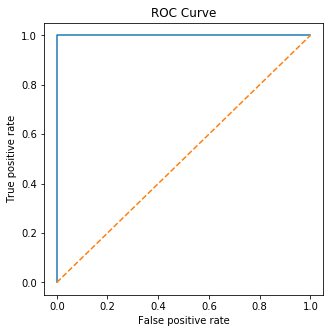

In [569]:
plt.figure(figsize=(5,5))
plt.plot( fpr, tpr )#, c=thresholds/thresholds.max(), cmap="viridis" )
plt.plot( [0,1],[0,1], "--" )
plt.title( "ROC Curve" )
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

In [528]:
pp = pre_probs > .50
pp = pp.astype(int)

In [529]:
tnr, fpr, fnr, tpr = confusion_matrix(y_test_1, pp).ravel()

In [530]:
print(tpr, fpr)
print(fnr, tnr)

161 0
0 447


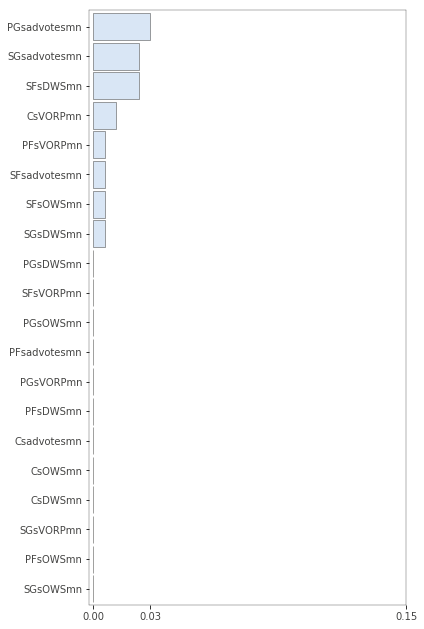

In [570]:
imp =importances(rf, X_test_1, y_test_1) 
viz = plot_importances(imp,width=6, vscale=2)
viz.view()